In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import IPython.display
import string
from collections import deque
from distutils.util import strtobool

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd './drive/My Drive'

/content/drive/My Drive


# DES

In [3]:
def bin2dec(bin_str):
    return int(bin_str, 2)

def shift_left(tab,n):
    arr = deque(tab)
    arr.rotate(-n)
    return list(arr)

def permute(k,perm):
    str = ''
    for i in range(0, len(perm)):
      str = str + k[perm[i]]
    return str

def xor(bin_str1,bin_str2):
    out = ''
    for i in range(0, len(bin_str1)):
      if (strtobool(bin_str1[i]) ^ strtobool(bin_str2[i])):
        out = out + '1'
      else:
        out = out + '0'
    return out

PC1 = [56, 48, 40, 32, 24, 16, 8, 0, 57, 49, 41, 33, 25, 17, 9, 1, 58,
       50, 42, 34, 26, 18, 10, 2, 59, 51, 43, 35, 62, 54, 46, 38, 30, 22,
       14, 6, 61, 53, 45, 37, 29, 21, 13, 5, 60, 52, 44, 36, 28, 20, 12,
        4, 27, 19, 11, 3] 

shift_table = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1 ] 

PC2=[13, 16, 10, 23, 0, 4, 2, 27, 14, 5, 20, 9, 22, 18, 11, 3,
     25, 7, 15, 6, 26, 19, 12, 1, 40, 51, 30, 36, 46, 54, 29, 39,
     50, 44, 32, 47, 43, 48, 38, 55, 33, 52, 45, 41, 49, 35, 28, 31]

def key_schedule(key):
    out = []
    newKey = permute(key, PC1)
    L = newKey[:28]
    R = newKey[28:]

    for i in range(0,16):
      L = shift_left(L, shift_table[i])
      R = shift_left(R, shift_table[i])
      LR = L + R
      subKey = permute(LR, PC2)
      out.append(subKey)
    return out

def Feistel(message, subkeys, F):
    L = message[:32]
    R = message[32:]
    for i in range(0,16):
      L = xor(F(R, subkeys[i]), L)
      if (i < 15):
        temp = L
        L = R
        R = temp
    return L+R

def F(right, subkey):
    output = ''
    right = permute(right, E)
    right = xor(right, subkey)

    n = 6
    sKeys = [right[i:i+n] for i in range(0, len(right), n)]

    for i in range(0,8):
      row = bin2dec(sKeys[i][0] + sKeys[i][5])
      column = bin2dec(sKeys[i][1:5])
      result = dec2bin(SBox[i][row][column], 4)
      output = output + result
    
    output = permute(output, P)
    return output

E = [31,  0,  1,  2,  3,  4,  3,  4,  5,  6,  7,  8,  7,  8,  9, 10, 11,
       12, 11, 12, 13, 14, 15, 16, 15, 16, 17, 18, 19, 20, 19, 20, 21, 22,
       23, 24, 23, 24, 25, 26, 27, 28, 27, 28, 29, 30, 31,  0]

SBox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7], 
        [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8], 
        [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0], 
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]], 
        
        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10], 
        [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5], 
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15], 
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]], 

        [ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8], 
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1], 
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7], 
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]], 

        [ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15], 
         [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9], 
         [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4], 
         [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ], 

        [ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9], 
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6], 
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14], 
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]], 
        
        [ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11], 
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8], 
         [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6], 
         [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
        
        [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1], 
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6], 
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2], 
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ], 

        [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7], 
         [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2], 
         [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8], 
         [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ] 

P = [ 15,  6, 19, 20, 28, 11, 27, 16,  0, 14, 22, 25,  4, 17, 30,  9,  1,
        7, 23, 13, 31, 26,  2,  8, 18, 12, 29,  5, 21, 10,  3, 24]

IP = [57, 49, 41, 33, 25, 17,  9,  1, 59, 51, 43, 35, 27, 19, 11,  3, 61,
       53, 45, 37, 29, 21, 13,  5, 63, 55, 47, 39, 31, 23, 15,  7, 56, 48,
       40, 32, 24, 16,  8,  0, 58, 50, 42, 34, 26, 18, 10,  2, 60, 52, 44,
       36, 28, 20, 12,  4, 62, 54, 46, 38, 30, 22, 14,  6] 

FP = [39,  7, 47, 15, 55, 23, 63, 31, 38,  6, 46, 14, 54, 22, 62, 30, 37,
        5, 45, 13, 53, 21, 61, 29, 36,  4, 44, 12, 52, 20, 60, 28, 35,  3,
       43, 11, 51, 19, 59, 27, 34,  2, 42, 10, 50, 18, 58, 26, 33,  1, 41,
        9, 49, 17, 57, 25, 32,  0, 40,  8, 48, 16, 56, 24]

def DES(message, subkeys):
    message = permute(message, IP)
    message = Feistel(message, subkeys, F)
    message = permute(message, FP)
    return message

# Lista 4 (6 pkt.) Termin: 10.12.20r.

## Zadanie 1 (1 pkt.)

Wczytaj obrazek $\textit{miki.png}$ tak jak w zadaniu 7. z listy 2.

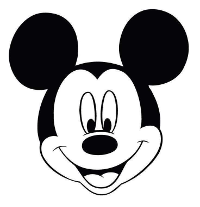

In [4]:
def dec2bin(dec_str,pad):
    return format(int(dec_str),'0'+str(pad)+'b')

img=Image.open('miki.png')
arr=np.array(img).ravel()
arr_bin=[dec2bin(d,pad='8') for d in arr]
bits=''.join(arr_bin)
img

i zaszyfruj go za pomocą DESa z kluczem:

In [5]:
key='0111101000001010110010000001010101111111100000000000101000110001'

stosując szyfrowanie blok po bloku, czyli tak jak na liście 2., tzn. w trybie ECB.
<img src="ECB_encryption.svg" width="1000" align="left"/>
<img src="ECB_decryption.svg" width="1000" align="left"/>

In [6]:
n = 64
sMsgs = [bits[i:i+n] for i in range(0, len(bits), n)]
subkeys = key_schedule(key)
img_t = ''
for i in range(0, len(sMsgs)):
  img_t = img_t + DES(sMsgs[i], subkeys[::-1])

Wyświetl zaszyfrowany obrazek.

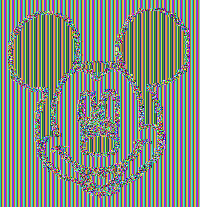

In [7]:
def split_img(img_bin,n):
    img_split=[]
    for i in range(0, len(img_bin), n):
        img_split.append(img_bin[i:i+n])
    return img_split

#img_t to ciąg bitów po zaszyfrowaniu
img=np.array([bin2dec(b) for b in split_img(img_t,8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

Mimo zaszyfrowania łatwo rozpoznać co było na obrazku.

## Zadanie 2 (2 pkt.)

Zaimplementuj tryb szyfrowania CBC.

<img src="CBC_encryption.svg" width="1000" align="left"/>

In [8]:
def CBC(msg,key,iv):
    n = 64
    sMsgs = [msg[i:i+n] for i in range(0, len(msg), n)]
    subkeys = key_schedule(key)
    out = ''

    sMsgs[0] = xor(iv, sMsgs[0])
    cipherText = ''

    for i in range(0, len(sMsgs)):
      if (i > 0):
        sMsgs[i] = xor(sMsgs[i], cipherText)
      cipherText = DES(sMsgs[i], subkeys)
      out = out + cipherText

    return out

In [9]:
#key to zmienna z poprzedniego zadania
iv='0011111111001100000111011100110100100101010100000111010001000110'
msg='1000110001101011011101110010100111101111101100111100001010100001011111110100000100100000111011001011000001011100110111101111110100000000100101011101110010000000110011011100000111000110011100111000010111111111011111000110001010101001101111110000010110011011'
print(CBC(msg,key,iv)=='1111101000110001101111001100101101011001101010001101010101100111011001100111010011001011100001001111011000001111110010011110011101010000101011010011011100011110011011001011100100011100011001011101110011110001110100010111001100100010111101011111101010111000')

True


Zaszyfruj obrazek z zadania 1. za pomocą DESa w trybie CBC, zaszyfrowany obrazek wyświetl i zobacz czy nadal widoczna jest na nim Myszka Miki.

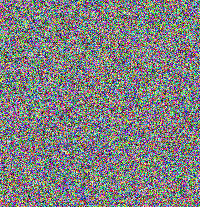

In [10]:
img_enc = CBC(bits, key, iv)
img=np.array([bin2dec(b) for b in split_img(img_enc,8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

## Zadanie 3 (1 pkt.)

Zaimplementuj deszyfrację w trybie CBC. Zdeszyfruj zaszyfrowany w poprzednim zadaniu obrazek i sprawdź czy otrzymałeś pierwotny obrazek.

<img src="CBC_decryption.svg" width="1000" align="left"/>

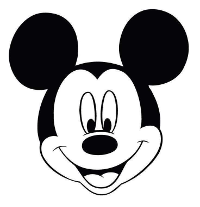

In [11]:
def CBCde(msg,key,iv):
    n = 64
    sMsgs = [msg[i:i+n] for i in range(0, len(msg), n)]
    subkeys = key_schedule(key)
    out = ''

    prevCipherText = ''

    for i in range(0, len(sMsgs)):
      if (i == 0):
        plainText = xor(iv, DES(sMsgs[i], subkeys[::-1]))
      else:
        plainText = xor(prevCipherText, DES(sMsgs[i], subkeys[::-1]))
      prevCipherText = sMsgs[i]
      out = out + plainText

    return out

img_dec = CBCde(img_enc, key, iv)
img=np.array([bin2dec(b) for b in split_img(img_dec,8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

## Zadanie 4 (2 pkt.)

Zaimplementuj tryb OFB. W tym trybie zarówno szyfracja jak i deszyfracja odbywają się za pomicą dokładnie tego samego algorytmu.

<img src="OFB_encryption.svg" width="1000" align="left"/>
<img src="OFB_decryption.svg" width="1000" align="left"/>

In [12]:
def OFB(msg,key,iv):
    n = 64
    sMsgs = [msg[i:i+n] for i in range(0, len(msg), n)]
    subkeys = key_schedule(key)
    out = ''

    feedback = ''

    for i in range(0, len(sMsgs)):
      if (i == 0):
        feedback = DES(iv, subkeys)
      else:
        feedback = DES(feedback, subkeys)
      cipherText = xor(feedback, sMsgs[i])
      out = out + cipherText

    return out

In [13]:
print(OFB(msg,key,iv)=='1100001001010001100110011101011100100011010101010111010010010011100101001100010001000100011110101011011101001110000000111000111101000101101111011100001111001100110010101110100110111000111000001100110010110101111101101100101110001010111011111110101100110000')

True


In [14]:
print(OFB(OFB(msg,key,iv),key,iv)==msg)

True
